In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
start= '2010-01-01'
end = '2022-12-31'

df=yf.download('AAPL',start=start,end= end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375158,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417540,447610800
...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.127060,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.307236,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.339417,85438400


In [6]:
df=df.reset_index()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375158,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417540,447610800


In [9]:
df=df.drop(['Date','Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


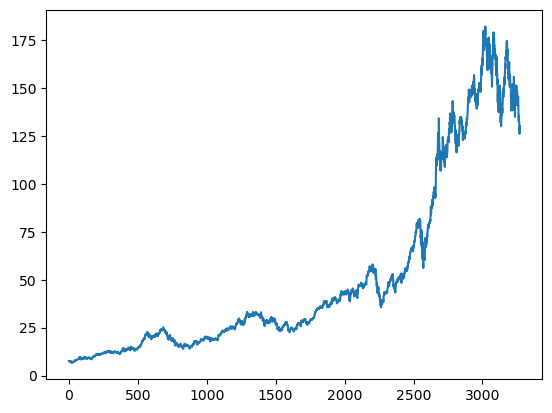

In [10]:
plt.plot(df.Close)

In [11]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3267,130.919998,132.419998,129.639999,131.860001,63814900
3268,131.380005,131.410004,128.720001,130.029999,69007800
3269,129.669998,131.029999,125.870003,126.040001,85438400
3270,127.989998,130.479996,127.730003,129.610001,75703700


In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

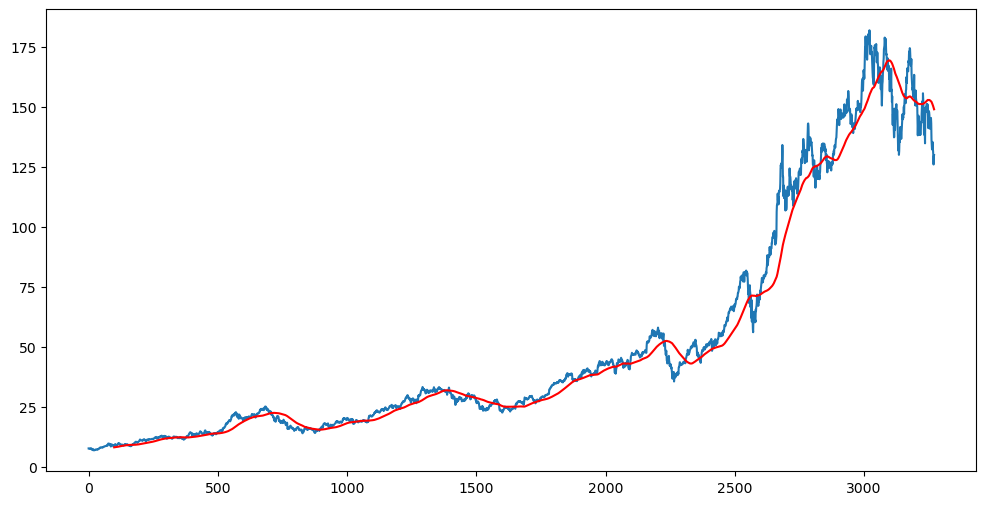

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

In [15]:
ma200[200]

8.784248237609864

In [16]:
ma200[199]

8.767198238372803

In [17]:
ma200[34]

nan

In [18]:
ma200[198]

nan

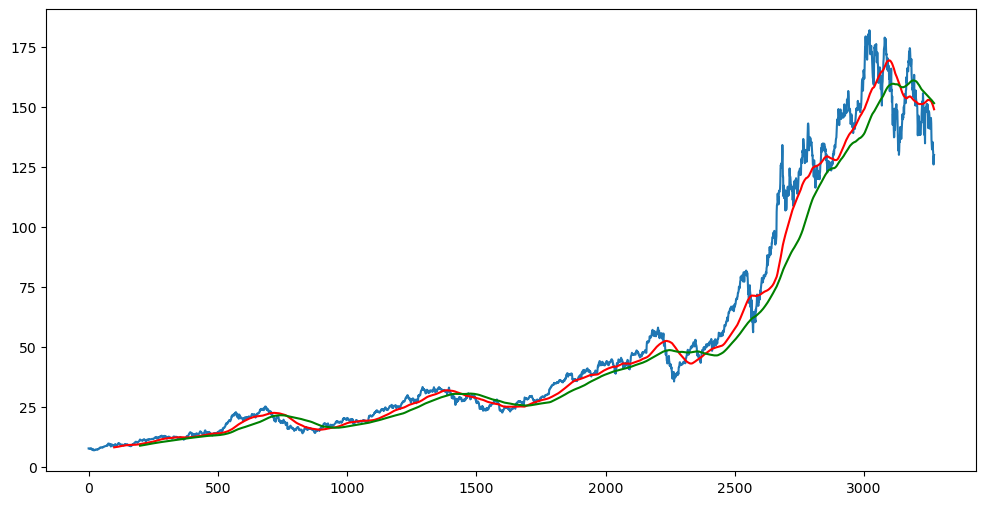

In [19]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [20]:
df.shape

(3272, 5)

splitting data into training and testing = training is 70%

In [22]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
data_training.shape


(2290, 1)

In [23]:
data_testing.shape

(982, 1)

In [24]:
data_training

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714
...,...
2285,41.630001
2286,42.812500
2287,43.544998
2288,43.560001


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array = scaler.fit_transform(data_training)

In [27]:
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [33]:
x_train = []
y_train = []

for i in range(100 , data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train =np.array(x_train),np.array(y_train)

x_train is previous records amd y is the to be predcted value

ML model

In [34]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [36]:
model = Sequential()
model.add(LSTM(units=50 ,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60 ,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80 ,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120 ,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [38]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50

69/69 [==============================] - 12s 117ms/step - loss: 0.0374
Epoch 2/50
69/69 [==============================] - 8s 117ms/step - loss: 0.0081
Epoch 3/50
69/69 [==============================] - 8s 123ms/step - loss: 0.0062
Epoch 4/50
69/69 [==============================] - 10s 141ms/step - loss: 0.0055
Epoch 5/50
69/69 [==============================] - 10s 143ms/step - loss: 0.0051
Epoch 6/50
69/69 [==============================] - 10s 142ms/step - loss: 0.0052
Epoch 7/50
69/69 [==============================] - 10s 148ms/step - loss: 0.0045
Epoch 8/50
69/69 [==============================] - 10s 144ms/step - loss: 0.0045
Epoch 9/50
69/69 [==============================] - 10s 144ms/step - loss: 0.0040
Epoch 10/50
69/69 [==============================] - 10s 150ms/step - loss: 0.0043
Epoch 11/50
69/69 [==============================] - 10s 142ms/step - loss: 0.0054
Epoch 12/50
69/69 [==============================] - 10s 145ms/step - loss: 0.0040
Epoch 13/50
6

In [40]:
model.save('keras_model.keras')

In [41]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [42]:
past_100_days = data_training.tail(100)

In [46]:
final_df = pd.concat([past_100_days , data_testing],ignore_index=True)

In [47]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [48]:
final_df.head()

,Close
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500


In [50]:
data_training.tail(100)

,Close
2190,55.959999
2191,54.470001
2192,54.560001
2193,54.592499
2194,55.007500
...,...
2285,41.630001
2286,42.812500
2287,43.544998
2288,43.560001


In [54]:
input_data = scaler.fit_transform(final_df) 

In [55]:
input_data

array([[0.13937014],
       [0.1291969 ],
       [0.1298114 ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [56]:
input_data.shape

(1082, 1)

In [57]:
x_test=[]
y_test = []

for i in range(100 ,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [59]:
x_test,y_test =np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


making predictions

In [60]:
y_predicted= model.predict(x_test)

31/31 [==============================] - 5s 123ms/step


In [61]:
y_predicted.shape

(982, 1)

In [62]:
y_test

array([0.04816933, 0.04649653, 0.04898865, 0.04777672, 0.04883503,
       0.04818639, 0.04905691, 0.05093454, 0.04927882, 0.05253905,
       0.05468976, 0.05486046, 0.05578219, 0.05284628, 0.05595289,
       0.05745499, 0.05690876, 0.05518478, 0.05173679, 0.05243663,
       0.06266108, 0.06609201, 0.06745755, 0.07090551, 0.07498506,
       0.07822822, 0.0756849 , 0.07846719, 0.09029614, 0.08340019,
       0.07945721, 0.07612869, 0.07899633, 0.07942306, 0.08152257,
       0.08372451, 0.08846975, 0.09073996, 0.09132031, 0.09355637,
       0.09884784, 0.09782367, 0.09973542, 0.09688486, 0.09674831,
       0.0973628 , 0.09739694, 0.10401981, 0.10526585, 0.10640949,
       0.1114449 , 0.1108987 , 0.10768968, 0.1060169 , 0.10654605,
       0.09982077, 0.11663396, 0.11429546, 0.11873346, 0.11315182,
       0.10355893, 0.1036272 , 0.09990612, 0.0938636 , 0.0743023 ,
       0.07932065, 0.08317828, 0.08174448, 0.079901  , 0.06981308,
       0.0758044 , 0.06928394, 0.06395836, 0.06278058, 0.06151

In [63]:
y_predicted

array([[0.11420131],
       [0.11503041],
       [0.11589839],
       [0.11677313],
       [0.11762683],
       [0.11844143],
       [0.11920375],
       [0.11990838],
       [0.12055969],
       [0.12115866],
       [0.12171637],
       [0.12224931],
       [0.12276979],
       [0.12328778],
       [0.12379941],
       [0.12430744],
       [0.12481725],
       [0.12532915],
       [0.12583569],
       [0.12631853],
       [0.1267647 ],
       [0.12719728],
       [0.12764737],
       [0.1281403 ],
       [0.12869984],
       [0.12934896],
       [0.13010615],
       [0.13096774],
       [0.1319279 ],
       [0.13300951],
       [0.13420258],
       [0.13547423],
       [0.13677843],
       [0.13808201],
       [0.13936003],
       [0.14060065],
       [0.14180368],
       [0.14298603],
       [0.14416882],
       [0.14536762],
       [0.14659691],
       [0.14787985],
       [0.14922512],
       [0.15063655],
       [0.15209857],
       [0.15358742],
       [0.15507302],
       [0.156

to find by how much factor it was scaled down bcos now we have to scale it up again

In [64]:
scaler.scale_

array([0.00682769])

divide both by scale factor which is multiplying by 1/scalefactore

In [65]:
scale_factor = 1/0.00682769
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

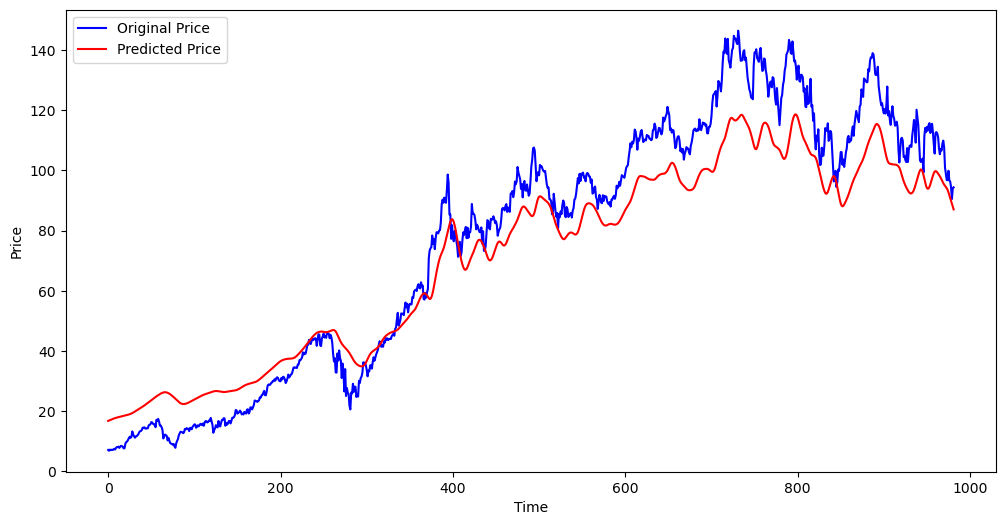

In [69]:
plt.figure(figsize = (12,6))
plt.plot(y_test , 'b' , label='Original Price')
plt.plot(y_predicted , 'r' , label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()